In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
data = pd.read_csv("temp_datalab_records_linkedin_company.csv")

c:\users\juan\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [150]:
data.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [151]:
data.dtypes

dataset_id                 int64
as_of_date                object
company_name              object
followers_count            int64
employees_on_platform      int64
link                      object
industry                  object
date_added                object
date_updated              object
description               object
website                   object
entity_id                float64
cusip                    float64
isin                     float64
dtype: object

In [152]:
data['industry'].nunique()

140

In [153]:
data.shape

(2426196, 14)

In [154]:
#data['company_name'].unique()

In [155]:
data.describe()

,dataset_id,followers_count,employees_on_platform,entity_id,cusip,isin
count,2.426196e+06,2.426196e+06,2.426196e+06,0.0,0.0,0.0
mean,7.347932e+05,7.167738e+04,7.587255e+03,NaN,NaN,NaN
std,5.004440e+05,2.638344e+05,2.412444e+04,NaN,NaN,NaN
min,5.832900e+04,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,6.851400e+04,2.148000e+03,2.180000e+02,NaN,NaN,NaN
50%,8.790880e+05,9.335000e+03,1.083000e+03,NaN,NaN,NaN
75%,9.029690e+05,3.864200e+04,4.513000e+03,NaN,NaN,NaN
max,2.339486e+06,7.833967e+06,5.779520e+05,NaN,NaN,NaN


In [156]:
data['as_of_date'] = pd.to_datetime(data['as_of_date'])

In [157]:
Google = data.loc[data['company_name'] == "Google", ]

In [158]:
Google.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
33,58448,2015-09-16,Google,3615989,67682,https://www.linkedin.com/company/1441,Internet,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
174,58448,2015-09-17,Google,3618814,67716,https://www.linkedin.com/company/1441,Internet,2015-09-17 00:00:00+00,2015-09-17 00:00:00+00,NaN,NaN,NaN,NaN,NaN
437,58448,2015-09-18,Google,3622173,67751,https://www.linkedin.com/company/1441,Internet,2015-09-18 00:00:00+00,2015-09-18 00:00:00+00,NaN,NaN,NaN,NaN,NaN
816,58448,2015-09-19,Google,3624480,67774,https://www.linkedin.com/company/1441,Internet,2015-09-19 00:00:00+00,2015-09-19 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1239,58448,2015-09-20,Google,3626696,67804,https://www.linkedin.com/company/1441,Internet,2015-09-20 00:00:00+00,2015-09-20 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [159]:
Google.shape

(1022, 14)

Text(0,0.5,'Employee Number')

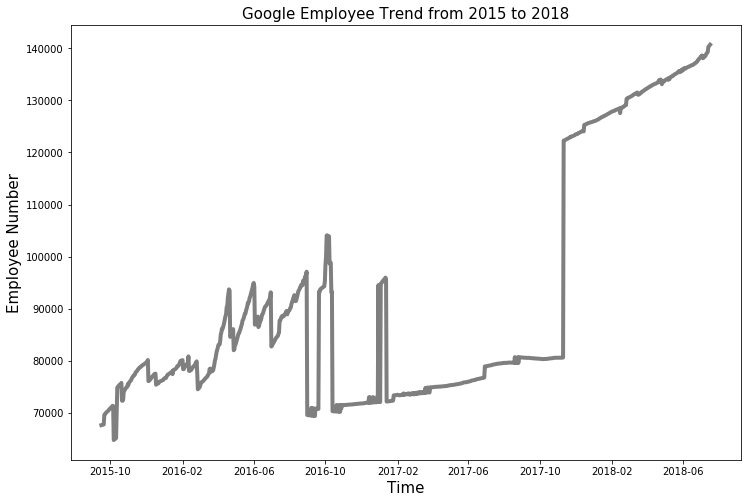

In [160]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
ax.plot(Google['as_of_date'], Google['employees_on_platform'], color = (0,0,0), linewidth = 4, alpha = 0.5)
ax.set_title('Google Employee Trend from 2015 to 2018', fontsize = 15)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('Employee Number', fontsize = 15)

In [161]:
newData = data.loc[: ,['as_of_date', 'employees_on_platform','industry']]

In [162]:
IndustryTrend = newData.pivot_table(index = 'as_of_date', columns = 'industry', values = 'employees_on_platform', aggfunc = np.sum)

In [163]:
IndustryTrend.head()

industry,Accounting,Airlines/Aviation,Apparel & Fashion,Apparel &amp; Fashion,Automotive,Aviation & Aerospace,Aviation &amp; Aerospace,Banking,Biotechnology,Broadcast Media,...,Transportation/Trucking/Railroad,Utilities,Venture Capital & Private Equity,Venture Capital &amp; Private Equity,Veterinary,Warehousing,Wholesale,Wine and Spirits,Wireless,Writing and Editing
as_of_date,,,,,,,,,,,,,,,,,,,,,
2015-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-16,NaN,NaN,NaN,NaN,187205.0,111255.0,NaN,537181.0,40472.0,NaN,...,12288.0,16232.0,NaN,NaN,NaN,NaN,NaN,20208.0,27673.0,NaN
2015-09-17,NaN,88509.0,5445.0,NaN,196022.0,111278.0,NaN,581639.0,51827.0,NaN,...,28006.0,24010.0,NaN,NaN,NaN,NaN,NaN,22869.0,27685.0,NaN
2015-09-18,NaN,106470.0,24204.0,NaN,302951.0,111300.0,NaN,583500.0,57684.0,NaN,...,28014.0,58076.0,NaN,NaN,NaN,NaN,8338.0,25555.0,27709.0,NaN


In [164]:
IndustryTrend.loc[:,IndustryTrend.isnull().sum() < 10].head()

industry,Airlines/Aviation,Banking,Chemicals,Financial Services,Hospitality,Machinery,Pharmaceuticals,Real Estate,Retail,Semiconductors,Telecommunications
as_of_date,,,,,,,,,,,
2015-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-16,NaN,537181.0,27650.0,1017193.0,NaN,NaN,558637.0,3024.0,540997.0,123161.0,270718.0
2015-09-17,88509.0,581639.0,100351.0,1140012.0,572.0,63400.0,560586.0,4699.0,606548.0,126659.0,507690.0
2015-09-18,106470.0,583500.0,129598.0,1232590.0,26904.0,63431.0,569639.0,16923.0,840456.0,138565.0,553510.0


In [165]:
IndustryTrend['Internet'].isnull().sum()

60

In [166]:
ind_selected_data = IndustryTrend.loc[:,IndustryTrend.isnull().sum() < 10]

In [167]:
ind_selected_data['Internet'] = IndustryTrend['Internet']

c:\users\juan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
ind_selected_data.dropna(inplace = True)

c:\users\juan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
#ind_selected_data.reset_index(inplace = True)

In [170]:
data1 = data_transpose.loc[:,'2015-09-17']
data1

industry
Airlines/Aviation       88509.0
Banking                581639.0
Chemicals              100351.0
Financial Services    1140012.0
Hospitality               572.0
Machinery               63400.0
Pharmaceuticals        560586.0
Real Estate              4699.0
Retail                 606548.0
Semiconductors         126659.0
Telecommunications     507690.0
Internet               246280.0
Name: 2015-09-17 00:00:00, dtype: float64

In [171]:
data2 = data_transpose.loc[:,'2018-07-17']
data2

industry
Airlines/Aviation      257996.0
Banking               1499553.0
Chemicals              270952.0
Financial Services    2441840.0
Hospitality            422420.0
Machinery              170564.0
Pharmaceuticals        861517.0
Real Estate            304564.0
Retail                2102165.0
Semiconductors         419616.0
Telecommunications    1444802.0
Internet               877304.0
Name: 2018-07-17 00:00:00, dtype: float64

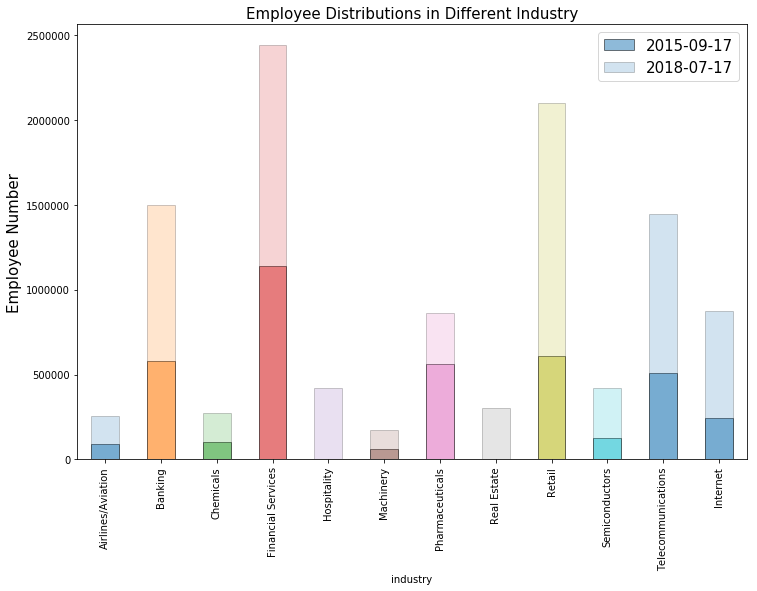

In [190]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca()
data1.plot.bar(ax = ax, edgecolor = 'black', alpha = 0.5)
data2.plot.bar(ax = ax, edgecolor = 'black', alpha = 0.2)
ax.set_title('Employee Distributions in Different Industry', fontsize = 15)
ax.set_ylabel('Employee Number', fontsize = 15)
ax.legend(['2015-09-17', '2018-07-17'], fontsize = 15)
plt.show()

In [173]:
ind_selected_data.reset_index().dtypes

industry
as_of_date            datetime64[ns]
Airlines/Aviation            float64
Banking                      float64
Chemicals                    float64
Financial Services           float64
Hospitality                  float64
Machinery                    float64
Pharmaceuticals              float64
Real Estate                  float64
Retail                       float64
Semiconductors               float64
Telecommunications           float64
Internet                     float64
dtype: object

In [174]:
data_smooth = ind_selected_data.rolling(50).mean()

In [175]:
data_smooth.dropna(inplace = True)

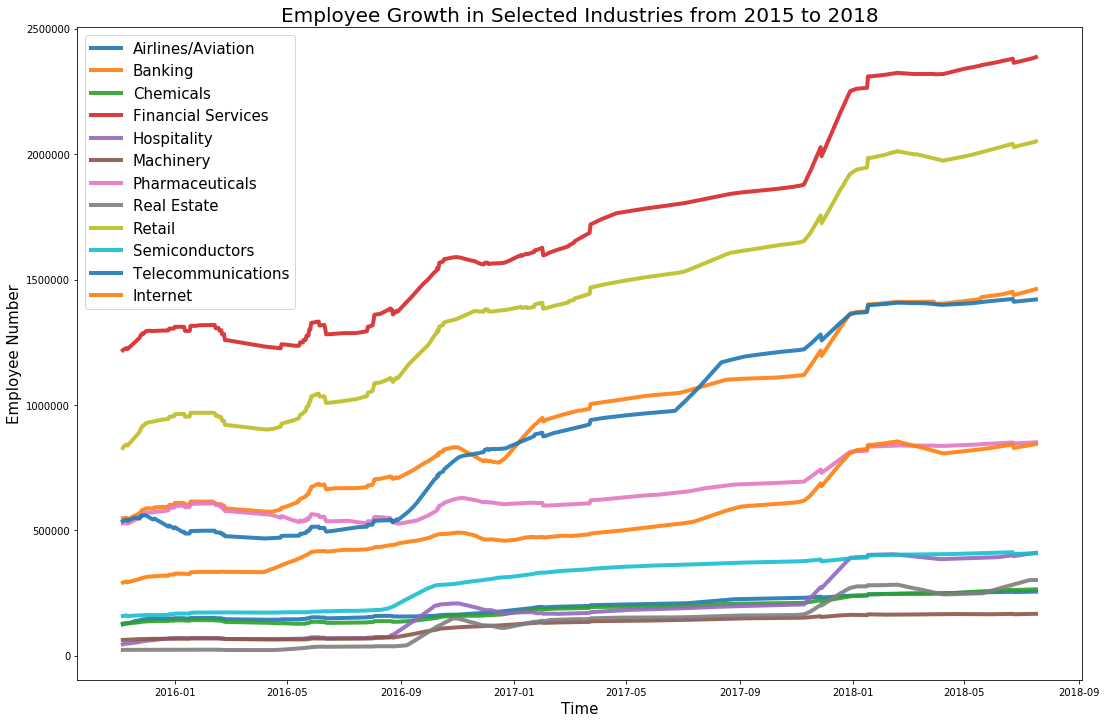

In [176]:
fig = plt.figure(figsize = (18,12))
ax = fig.add_subplot(111)
ax.plot(data_smooth.reset_index().as_of_date, data_smooth, linewidth = 4, alpha = 0.9)
ax.set_title('Employee Growth in Selected Industries from 2015 to 2018', fontsize = 20)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('Employee Number', fontsize = 15)
ax.legend(data_smooth.columns, fontsize = 15)
fig.savefig('EmployeeGrowth.png', transparent=False)

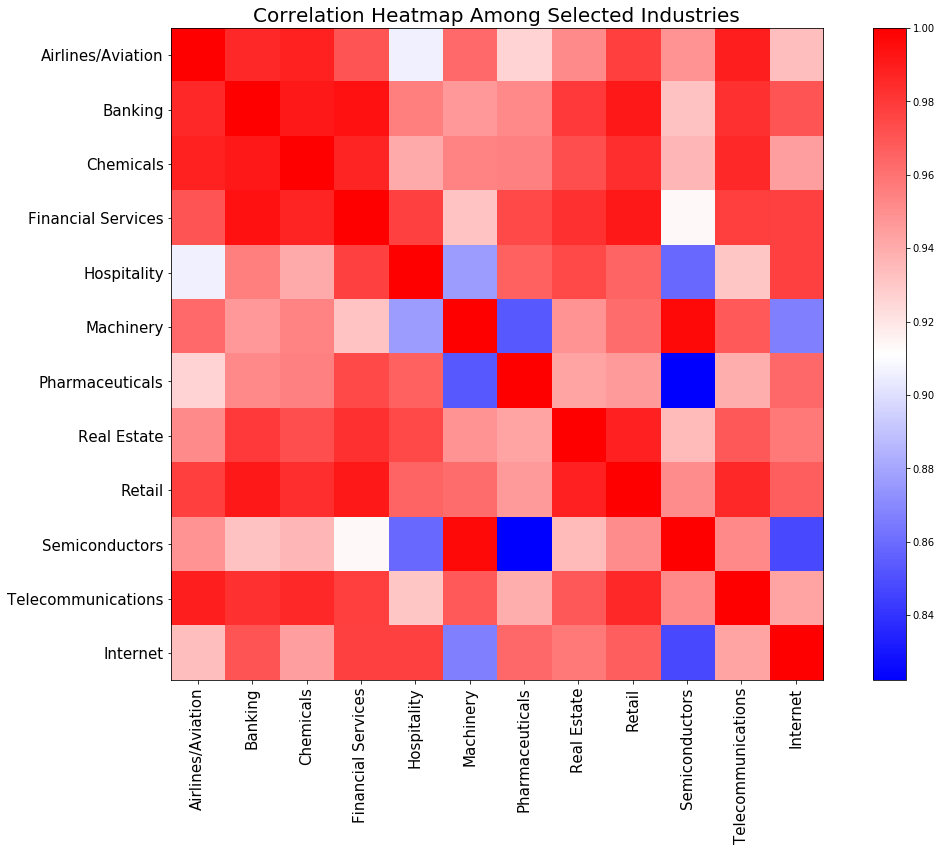

In [177]:
corr = data_smooth.corr()
fig = plt.figure(figsize = (18,12))
ax = fig.add_subplot(111)
img = ax.imshow(corr, cmap=plt.get_cmap('bwr'), interpolation='nearest')
ax.set_title('Correlation Heatmap Among Selected Industries', fontsize = 20)
labels = data_smooth.columns
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, fontsize = 15, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 15)
fig.colorbar(img)
fig.savefig('CorrelationHeatmap.png', transparent=False)